#### Importamos las librerías necesarias para el análisis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

#### De nuevo, usaremos la base de datos Iris

In [22]:
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# iris = pd.read_csv(url, names=names)
# iris.head()
url = "dist_student_bolsa.xlsx"

  

names = ['ALUA.BA', 'BMA.BA']
# iris = pd.read_csv(url, names=names)
bolsa = pd.read_excel(url,names=names)
bolsa.head(20)



,ALUA.BA,BMA.BA
2004-01-01,2.152861,1.246994
2004-02-01,2.094147,1.332572
2004-03-01,2.079468,1.369249
2004-04-01,1.859289,1.308121
2004-05-01,1.678253,1.079913
2004-06-01,1.663575,1.096214
2004-07-01,1.815253,1.202168
2004-08-01,1.859289,1.251070
2004-09-01,2.055004,1.332572
2004-10-01,2.201790,1.414075


## Tipos de pruebas:

### a) Distribución t de Student

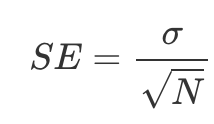

In [23]:


se_ALUA=bolsa['ALUA.BA'].std()/np.sqrt(10)


se_BMA=bolsa['BMA.BA'].std()/np.sqrt(10)


print('ALUA.BA se_length : '+ str(se_ALUA) +'  BMA.BA se_width   :' + str(se_BMA))

ALUA.BA se_length : 61.88854334376964  BMA.BA se_width   :310.0162444391595


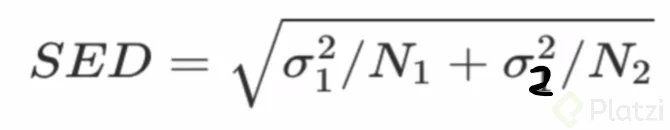

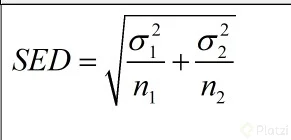

In [24]:
sed=np.sqrt((se_ALUA**2) + (se_BMA**2))

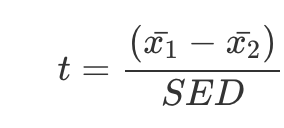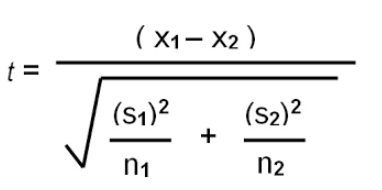

In [25]:
t_stat=(bolsa['ALUA.BA'].mean() - bolsa['BMA.BA'].mean())/sed
t_stat

-0.5885462882448381

In [26]:
p = ttest_ind(bolsa['ALUA.BA'], bolsa['BMA.BA'])
p

TtestResult(statistic=-2.9250217631920905, pvalue=0.003603357897868617, df=492.0)

El valor absoluto del valor t(-0.5885462882448381) es menor  que el valor crítico(pvalue=0.003603357897868617), entonces se aceptan  la hipótesis nula(que la distrubuicion de amabas sean muy similares ) , entonces se rechaza la al ternativa que la distribuicion de aluar  es muy diferente a la distribucion de  bma

### b) Correlación y coeficiente de Pearson

In [27]:
# Estudiamos la correlación entre length y width
bolsa['ALUA.BA'].corr(bolsa['BMA.BA'])

0.899934678003624

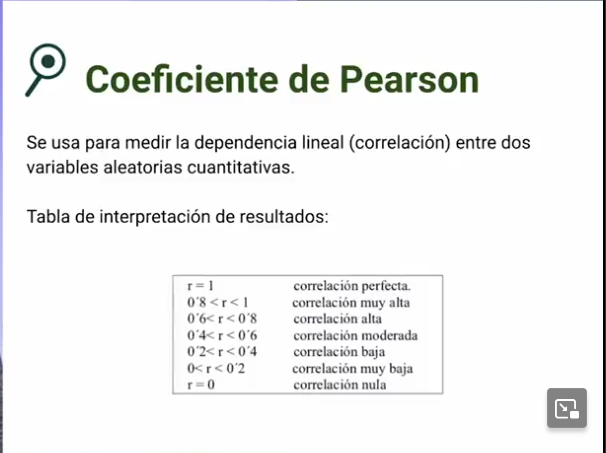

es una correlacion muy ALTA

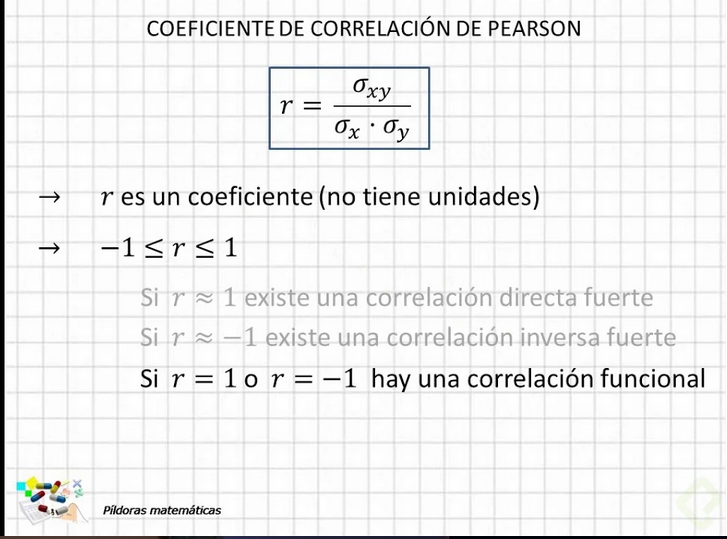

In [28]:
# A continuación, estudiamos la correlación de Pearson entre ambas variables
st.pearsonr(bolsa['ALUA.BA'], bolsa['BMA.BA'])

PearsonRResult(statistic=0.8999346780036237, pvalue=2.7071902836705397e-90)

HAY CORRELACION SI SUBE UNA LA OTRA TAMBIEN

### c) Análisis de la varianza (ANOVA)

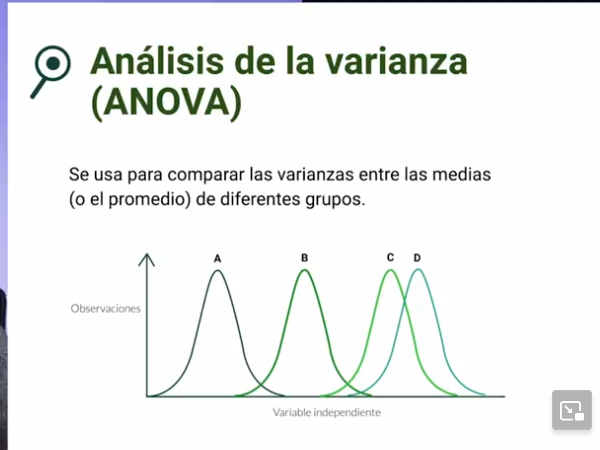

In [20]:
f_oneway(bolsa['ALUA.BA'], bolsa['BMA.BA'])

F_onewayResult(statistic=8.55575231514737, pvalue=0.003603357897868352)

F Test es =8.55575231514737 y su pvalue correspondiente es 0.003603357897868352. Dado que es un número inferior a 0.05 rechazamos la hipótesis nula de que las medias entre variables son similares y concluimos que sí hay BAJAS diferencias